In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler

In [80]:
data=pd.read_csv("creditcard_csv.csv")
df=pd.DataFrame(data)
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,'0'
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,'0'
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,'0'
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,'0'
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,'0'


In [3]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
features=df.drop('Class', axis=1)
features.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
target=df['Class']
target.head()

0    '0'
1    '0'
2    '0'
3    '0'
4    '0'
Name: Class, dtype: object

In [30]:
target.value_counts()

'0'    284315
'1'       492
Name: Class, dtype: int64

<Figure size 600x400 with 0 Axes>

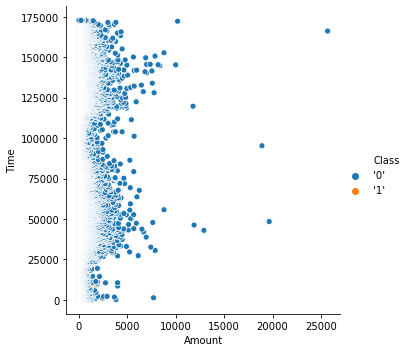

In [28]:
plt.figure(dpi=100)
sns.relplot(x='Amount',y='Time',hue='Class',data=df)
plt.show()

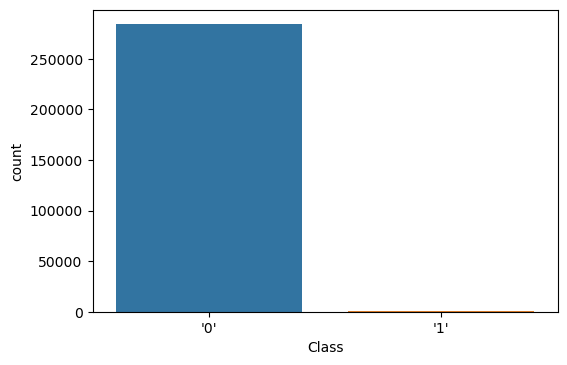

In [27]:
plt.figure(dpi=100)
sns.countplot(target)
plt.show()

In [21]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.20)
x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
194843,130780.0,-1.756999,-0.234469,-0.293316,-0.264355,0.746045,-1.260569,0.783059,0.281690,-0.118531,...,0.463022,0.042857,-0.484848,0.140382,-0.292786,0.156311,-0.089297,-0.051945,-0.063696,169.30
65485,51608.0,1.340873,-1.362378,0.733710,-1.453998,-1.753716,-0.236698,-1.320526,0.051501,-1.779361,...,-0.175164,-0.170180,-0.301496,0.015286,-0.026132,0.139265,-0.300403,0.037912,0.029953,79.20
213470,139269.0,-1.041117,-0.453976,0.357497,-0.538454,1.940701,-0.627506,0.095695,-0.102484,0.211977,...,-0.049707,0.136260,0.502167,-0.385086,0.118311,0.523797,-0.201187,-0.063815,0.040396,36.00
233815,147716.0,0.131181,0.974933,-0.529777,-0.740559,1.136504,-0.318078,0.851656,0.064833,-0.267285,...,0.030970,-0.315412,-0.795414,0.036300,0.174198,-0.408114,0.117013,0.218059,0.070269,1.29
70567,53924.0,1.094492,0.157177,0.604723,1.615537,-0.329535,-0.102203,-0.152814,0.198809,-0.673799,...,-0.199017,-0.145334,-0.613584,0.176254,0.200270,-0.041406,0.747247,-0.084649,-0.001033,22.87


In [22]:
y_train[:5]

194843    '0'
65485     '0'
213470    '0'
233815    '0'
70567     '0'
Name: Class, dtype: object

In [31]:
model=LogisticRegression()
model.fit(x_train,y_train)

F:\RC SLOG\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
pred = model.predict(x_test)
pred[:5]

array(["'0'", "'0'", "'0'", "'0'", "'0'"], dtype=object)

In [42]:
y_test[:5]

21233     '0'
169338    '0'
252689    '0'
235313    '0'
77873     '0'
Name: Class, dtype: object

In [43]:
print(confusion_matrix(y_test,pred))

[[56843    28]
 [   31    60]]


In [45]:
print(accuracy_score(y_test,pred)*100)

99.89642217618764


In [47]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         '0'       1.00      1.00      1.00     56871
         '1'       0.68      0.66      0.67        91

    accuracy                           1.00     56962
   macro avg       0.84      0.83      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [48]:
cnf = pd.DataFrame(confusion_matrix(y_test, pred), columns=['Not Fraud', 'Fraud'], index=['Not Fraud', 'Fraud'])
cnf

,Not Fraud,Fraud
Not Fraud,56843,28
Fraud,31,60


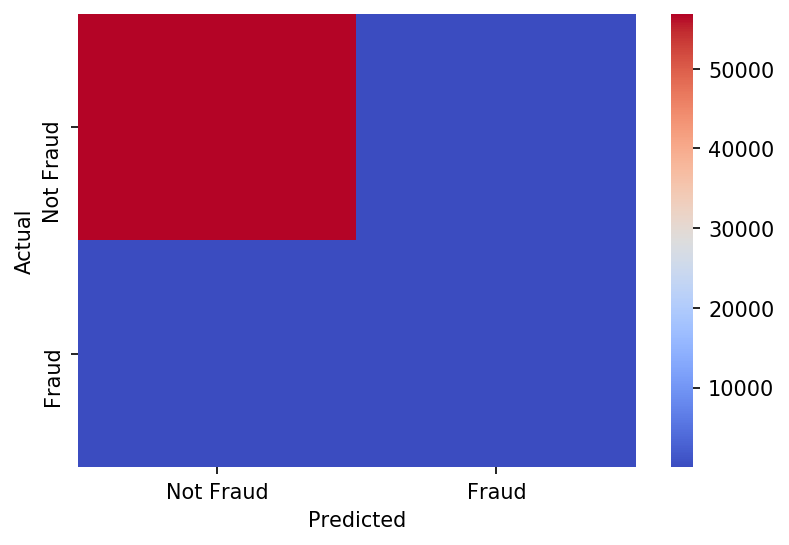

In [52]:
plt.figure(dpi=150)
sns.heatmap(cnf, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
f=df[['Time','Amount']]
f.head()

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99


In [152]:
X_train,X_test,Y_train,Y_test=train_test_split(f,target,test_size=0.20)
X_train.head()

,Time,Amount
14724,25955.0,15.59
53650,46086.0,353.00
187325,127481.0,99.99
124573,77345.0,250.00
127840,78491.0,591.12


In [153]:
Y_train[:5]

14724     '0'
53650     '0'
187325    '0'
124573    '0'
127840    '0'
Name: Class, dtype: object

In [156]:
pred1 = model1.predict(X_test)
pred1[:5]

array(["'0'", "'0'", "'0'", "'0'", "'0'"], dtype=object)

In [157]:
Y_test[:5]

106825    '0'
19999     '0'
7145      '0'
249464    '0'
178490    '0'
Name: Class, dtype: object

In [154]:
model1=LogisticRegression()
model1.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
import pickle
fp=open('cc_fraud_df.pk1','wb')
pickle.dump(model,fp)
fp.close()

In [196]:
import tkinter as tk
import PIL.Image
import PIL.ImageTk

with open('cc_fraud_df.pk1', 'rb') as fp:
    model = pickle.load(fp)
    fp.close()
    
root=tk.Tk()
root.title('Fraud Trasanction Detector')

canvas = tk.Canvas(root, height=600, width=900)

im = PIL.Image.open("imgonline-com-ua-resize-yhHHiiU8sudd.jpg")
photo = PIL.ImageTk.PhotoImage(im)
background_label = tk.Label(root, image=photo)
background_label.place(relx=0, rely=0, relwidth=1, relheight=1)

canvas.pack()


time=tk.IntVar()
amount=tk.DoubleVar()

def clear():
    time.set('')
    amount.set('')
clear()

l=tk.Label(root,text='Check Your Transaction', bd=2,relief='sunken')
l.config(bg='#3E3E43',fg='#FFFFFF', font=('Courier', 20, 'bold'))
l.place(relx=0.5, rely=0.02, relwidth=0.5, relheight=0.1, anchor='n')

l1 = tk.Label(root, text="Enter Amount"+" : ")
l1.config(bg='#3E3E43', fg='#FFFFFF', font=('Courier', 12, 'bold'))
l1.place(relx=0.45, rely=0.34, relwidth=0.17, relheight=0.04)

e1 = tk.Entry(root,textvariable=amount,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e1.place(relx=0.6, rely=0.34, relwidth=0.11, relheight=0.04)

l2 = tk.Label(root, text="Enter Time"+" : ")
l2.config(bg='#3E3E43', fg='#FFFFFF', font=('Courier', 12, 'bold'))
l2.place(relx=0.55, rely=0.21, relwidth=0.17, relheight=0.04)

e2 = tk.Entry(root,textvariable=time,bg='#3E3E43',fg='#FFFFFF',font=('Courier', 12))
e2.place(relx=0.7, rely=0.21, relwidth=0.11, relheight=0.04)

b1 = tk.Button(root, text='Submit', command=lambda : predict())
b1.config(bg='#eeeeee', fg='black', font=('Courier', 12, 'bold'),border=5)
b1.place(relx=0.72, rely=0.34, relwidth=0.11, relheight=0.04)

def predict():
    t = time.get()
    a = amount.get()
    features = [ [ t, a] ]
    clear()
    m = model1.predict(f)[0]
    if m=="'0'":
        text ="No Fraud Seems to be at this Transaction."
    else:
        text ="It seems to have a Fraud Transaction"
        
    label = tk.Label(root,text=text,relief='sunken')
    label.config(font=('Courier', 18))
    label.place(relx=0.1, rely=0.9, relwidth=0.8, relheight=0.065)

root.mainloop()